# Домашнее задание 5 - уменьшение размерностей

__Оценки-баллы__: 
- 1: 1-4
- 2: 5-6
- 3: 7-8
- 4: 9-10
- 5: 11-12
- 6: 13
- 7: 14
- 8: 15
- 9: 16
- 10: 17-18


__DL (срок сдачи ДЗ)__: 26.11.2021 23:59. После этого срока работы НЕ будут приниматься

__Формат сдачи - в личный аккаунт telegram: @zhuikov_vv__: hw10_11_ivanov_i_i.ipynb
        

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import MDS

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#### Задание 1 [1]

Каковы главные мотивы для понижения размерности набора данных? В чем заключаются основные недостатки понижения размерности? 

**Ответ**

Мотивы:
1. Уменьшить скорость обучения моделей, не уменьшая точность.
2. Визуализировать данные.

Основной недостаток - потеря информации.

#### Задание 2 [1] 

Что такое "проклятие размерности"?

**Ответ**

По мере увеличения размерности пространства признаков для объекта число необходимых объектов растёт.

#### Задание 3 [1] 

После того как размерность набора данных была понижена, можно ли обратить операцию? Если да, то как? Если нет, то почему? 

**Ответ**

Кажется, что нельзя обратить операцию. В процессе понижения размерности теряется информация о позиции точек, а для отмены операции как раз эта информация нужна.

#### Задание 4 [1]

 Можно ли использовать алгоритм РСА для понижения размерности крайне нелинейного набора данных?

**Ответ**

Можно, но в таком случае будет сильное искажение расстояний между точками и это сильно повлияет на результат. Для нелинейных наборов лучше использовать manifold methods.

#### Задание 5 [1]

Предположим, что вы выполняете алгоритм РСА на 1000-мерном наборе данных, установив коэффициент объясненной дисперсии в 95%. Сколько измерений будет иметь результирующий набор данных? 

**Ответ**

Около 200.

In [2]:
# pca = PCA(n_components=0.95)
# X_reduced = pca.fit_transform(X_train)
# pca.n_components_

#### Задание 6 [1]

 В каких случаях вы бы применяли простой алгоритм РСА, инкрементный РСА, рандомизированный РСА или ядерный РСА?

**Ответ**

Простой алгоритм PCA требует память для целого набора. Инкрементный не требует, так как разбивает набор на пакеты. Рандомизированный лучше работает с большим количеством фичей. Ядерный лучше работает с нелинейной размерностью.

Примеры:
* Простой PCA - небольшой набор данных;
* Инкремемнтный PCA - большой набор данных;
* Рандомизированный PCA - большое количество признаков, разпонавание лиц;
* Ядерный PCA - шумоподавление, сжатие.    

#### Задание 7 [1]

Как вы можете оценить производительность алгоритма понижения размерности на своем наборе данных?

**Ответ**

Можем замерить время работы конкретного алгоритна с разными размерами набора данных и разным количеством фичей. И потом сравнить метрики с другими алгоритмами.

#### Задание 8 [1]

Имеет ли какой-нибудь смысл соединять в цепочку два разных алгоритма понижения размерности? 

**Ответ**

Кажется, что да, в зависимости от ситуации используем наиболее подходящий алгоритм. Например, если у нас 3-мерный набор, который по z достаточной плоский, а в x и y спираль, то сначала можно использовать PCA, а потом LLE.

#### Задание 9 [10] 

Воспользуйтесь алгоритмом t-SNE для понижения размерности набора данных MNIST до двух измерений и вычертите результат с применением Matplotlib. Для представления целевого класса каждого изображения можете использовать график рассеяния с 10 разными цветами. В качестве альтернативы на месте каждого образца вы можете выводить цветные цифры или даже рисовать версии с уменьшенным размером самих изображений цифр (в случае вычерчивания всех цифр визуализация будет слишком перегруженной, поэтому вы должны либо рисовать случайную выборку, либо вычерчивать образец, только если не были вычерчены другие образцы на близком расстоянии). Вы должны получить аккуратную визуализацию с вполне разделенными кластерами цифр. Попробуйте применить другие алгоритмы понижения размерности, такие как РСА, LLE или MDS, и сравните результирующие визуализации. 

In [3]:
import urllib.request
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, as_frame=False)
    mnist.target = mnist.target.astype(np.int64)
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')

In [4]:
X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

columns = ['pixel_' + str(i) for i in range(X_train.shape[1])]
df = pd.DataFrame(X_train,columns=columns)
df['y'] = y_train

### t-SNE

In [5]:
tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X_train)

/Users/bestk1ng/Developer/Education/Master/Term 1/Data Analysis/env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/bestk1ng/Developer/Education/Master/Term 1/Data Analysis/env/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot:xlabel='tsne_1', ylabel='tsne_2'>

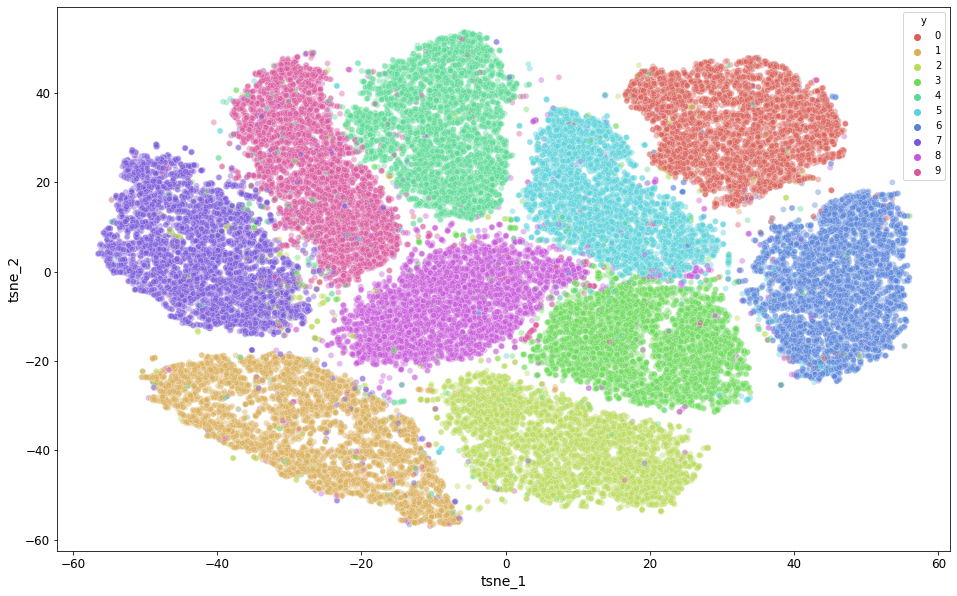

In [6]:
df['tsne_1'] = X_reduced_tsne[:,0]
df['tsne_2'] = X_reduced_tsne[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne_1", y="tsne_2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.4
)

### PCA

In [7]:
pca = PCA(n_components=2)
X_reduced_pca = pca.fit_transform(X_train)

<AxesSubplot:xlabel='pca_1', ylabel='pca_2'>

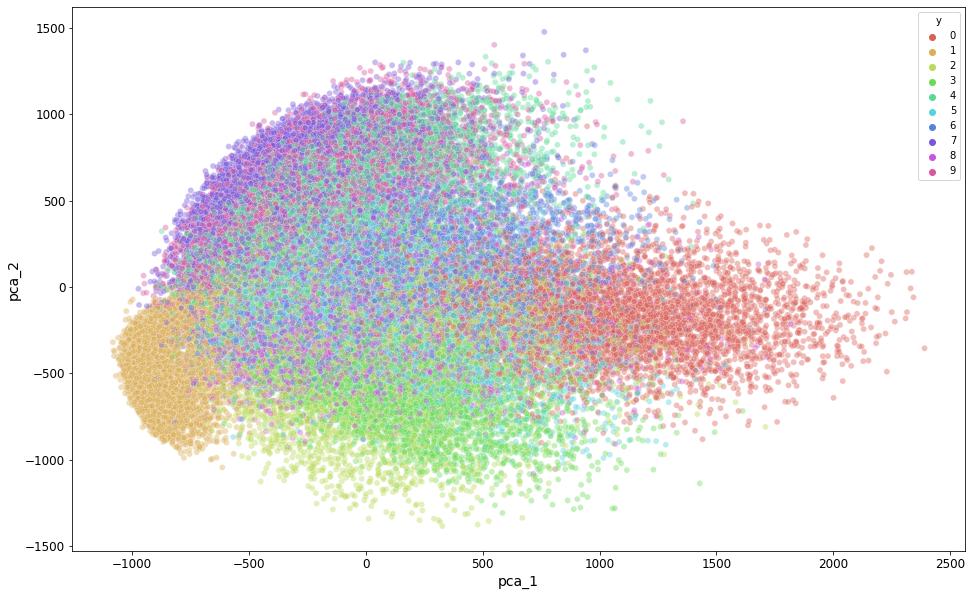

In [8]:
df['pca_1'] = X_reduced_pca[:,0]
df['pca_2'] = X_reduced_pca[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca_1", y="pca_2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.4
)

### LLE

In [ ]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced_lle = lle.fit_transform(X_train)

In [ ]:
df['lle_1'] = X_reduced_lle[:,0]
df['lle_2'] = X_reduced_lle[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="lle_1", y="lle_2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.4
)

### MDS

In [ ]:
mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X_train)

In [ ]:
df['mds_1'] = X_reduced_mds[:,0]
df['mds_2'] = X_reduced_mds[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="mds_1", y="mds_2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.4
)